In [2]:
#Import all modules. Set path for iimporting dishpill_models

import sys
import os
import pathlib
import datetime
import numpy as np
import pandas as pd
import scipy
import scipy.stats as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pingouin as pg
pd.options.display.max_columns = 150
%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 250)
sns.set_style("whitegrid")
from scipy.stats import ttest_ind
from statsmodels.stats.anova import AnovaRM
import warnings
warnings.filterwarnings('ignore')
path = "../models"
if not path in sys.path:
    sys.path.append(path)
%reload_ext autoreload
%autoreload 1
from statannot import add_stat_annotation
import math

import dishpill_models

/opt/conda/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
#group_data takes a pandas data frame and a list of tags, and assigns: whether it is a control trials,
#    a rounded elapsed minute to each trial, and groups into two timepoints or "halfs". 
def group_data(dataframe, tag_list):
    print("Chosen tags are", tag_list)
    df = dataframe
    mask = df['tag'].isin(tag_list)
    df = df[mask]
    group = df['tag'].str.contains('ctl', case = False)
    df['group'] = group.astype(int)
    halfmask = df['elapse_seconds']>t1
    df['elapse_minute_rounded'] = np.int32(df['elapse_seconds'] / 60.)
    df.loc[:,'half'] = halfmask
    df["half"] = df["half"].astype(int)
    
    #df = df[df['hit_count']>0]
    df
    return df

In [4]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

In [5]:
df = pd.read_pickle('in_vitro_cells_sentience_corr.pkl')

In [6]:
exp_corr2 = df[(df.half == 1) & ((df.group == 0) | (df.group == 2))]
exp_corr2 = exp_corr2.groupby(['group', 'tag', 'chip_id', 'date', 'session_num']).mean()
exp_corr2.reset_index()
exp_corr2 = exp_corr2[~exp_corr2.groupby(['group'])['dct01_firing'].apply(is_outlier)]
exp_corr2 = exp_corr2[~exp_corr2.groupby(['group'])['dct02_firing'].apply(is_outlier)]
exp_corr2 = exp_corr2[~exp_corr2.groupby(['group'])['dct10_firing'].apply(is_outlier)]
exp_corr2 = exp_corr2[~exp_corr2.groupby(['group'])['dct20_firing'].apply(is_outlier)]
exp_corr2['normdct01_firing'] = exp_corr2['dct01_firing']/exp_corr2['mean_firing']
exp_corr2['normdct10_firing'] = exp_corr2['dct10_firing']/exp_corr2['mean_firing']
exp_corr2['normdct02_firing'] = exp_corr2['dct02_firing']/exp_corr2['mean_firing']
exp_corr2['normdct20_firing'] = exp_corr2['dct20_firing']/exp_corr2['mean_firing']
exp_corr2['normdct01_firing'] =exp_corr2['normdct01_firing'].abs()
exp_corr2['normdct10_firing'] =exp_corr2['normdct10_firing'].abs()
exp_corr2['normdct02_firing'] =exp_corr2['normdct02_firing'].abs()
exp_corr2['normdct20_firing'] =exp_corr2['normdct20_firing'].abs()




#exp_corr2['dct00_firing'] = exp_corr2['dct00_firing'].abs()
#exp_corr2['dct01_firing'] = exp_corr2['dct01_firing'].abs()
#exp_corr2['dct02_firing'] = exp_corr2['dct02_firing'].abs()
#exp_corr2['dct10_firing'] = exp_corr2['dct10_firing'].abs()
#exp_corr2['dct11_firing'] = exp_corr2['dct11_firing'].abs()
#exp_corr2['dct12_firing'] = exp_corr2['dct12_firing'].abs()
#exp_corr2['dct21_firing'] = exp_corr2['dct21_firing'].abs()
#exp_corr2['dct22_firing'] = exp_corr2['dct22_firing'].abs()
exp_corr2['dct20_firing'] = exp_corr2['dct20_firing'].abs()
#exp_corr2 = exp_corr2.fillna(method='ffill', inplace=False)
pg.pairwise_corr(exp_corr2, columns=['hit_count']).round(3)

X                      Y   method       tail    n      r  \
0   hit_count         elapse_seconds  pearson  two-sided  450  0.183   
1   hit_count            mean_firing  pearson  two-sided  450  0.174   
2   hit_count             max_firing  pearson  two-sided  450 -0.023   
3   hit_count             var_firing  pearson  two-sided  450  0.086   
4   hit_count            norm_firing  pearson  two-sided  450  0.103   
5   hit_count             q95_firing  pearson  two-sided  450  0.175   
6   hit_count             q90_firing  pearson  two-sided  450  0.169   
7   hit_count             q75_firing  pearson  two-sided  450  0.168   
8   hit_count             q50_firing  pearson  two-sided  450  0.121   
9   hit_count           dct00_firing  pearson  two-sided  450  0.173   
10  hit_count           dct01_firing  pearson  two-sided  450 -0.109   
11  hit_count           dct02_firing  pearson  two-sided  450 -0.002   
12  hit_count           dct10_firing  pearson  two-sided  450 -0.101   
13  hit_count           dct11_firing  pearson  two-sided  450 -0.044   
14  hit_count           dct12_firing  pearson  two-sided  450  0.043   
15  hit_count           dct20_firing  pearson  two-sided  450  0.121   
16  hit_count           dct21_firing  pearson  two-sided  450 -0.128   
17  hit_count           dct22_firing  pearson  two-sided  450 -0.008   
18  hit_count  elapse_minute_rounded  pearson  two-sided  450  0.182   
19  hit_count             long_rally  pearson  two-sided  450  0.640   
20  hit_count                    ace  pearson  two-sided  450 -0.639   
21  hit_count       normdct01_firing  pearson  two-sided  450 -0.053   
22  hit_count       normdct10_firing  pearson  two-sided  450 -0.052   
23  hit_count       normdct02_firing  pearson  two-sided  450 -0.168   
24  hit_count       normdct20_firing  pearson  two-sided  450 -0.024   

             CI95%     r2  adj_r2      z  p-unc       BF10  power  
0     [0.09, 0.27]  0.034   0.029  0.186  0.000    122.554  0.975  
1     [0.08, 0.26]  0.030   0.026  0.175  0.000     53.963  0.960  
2    [-0.12, 0.07]  0.001  -0.004 -0.023  0.629      0.066  0.077  
3    [-0.01, 0.18]  0.007   0.003  0.086  0.070      0.304  0.443  
4     [0.01, 0.19]  0.011   0.006  0.103  0.030      0.626  0.587  
5     [0.08, 0.26]  0.031   0.026  0.177  0.000     63.114  0.963  
6     [0.08, 0.26]  0.029   0.024  0.171  0.000     38.552  0.951  
7     [0.08, 0.26]  0.028   0.024  0.169  0.000     34.454  0.948  
8     [0.03, 0.21]  0.015   0.010  0.121  0.010      1.555  0.728  
9     [0.08, 0.26]  0.030   0.026  0.175  0.000     51.195  0.959  
10   [-0.2, -0.02]  0.012   0.007 -0.109  0.021      0.839  0.637  
11   [-0.09, 0.09]  0.000  -0.004 -0.002  0.969      0.059  0.050  
12  [-0.19, -0.01]  0.010   0.006 -0.101  0.033      0.569  0.569  
13   [-0.14, 0.05]  0.002  -0.003 -0.044  0.356       0.09  0.152  
14   [-0.05, 0.13]  0.002  -0.003  0.043  0.365      0.089  0.148  
15    [0.03, 0.21]  0.015   0.010  0.122  0.010      1.579  0.730  
16  [-0.22, -0.04]  0.016   0.012 -0.129  0.006      2.403  0.780  
17    [-0.1, 0.08]  0.000  -0.004 -0.008  0.861       0.06  0.053  
18    [0.09, 0.27]  0.033   0.029  0.184  0.000    109.591  0.974  
19    [0.58, 0.69]  0.410   0.407  0.759  0.000  7.314e+49  1.000  
20  [-0.69, -0.58]  0.408   0.406 -0.757  0.000  4.088e+49  1.000  
21   [-0.14, 0.04]  0.003  -0.002 -0.053  0.262       0.11  0.202  
22   [-0.14, 0.04]  0.003  -0.002 -0.052  0.267      0.109  0.199  
23  [-0.26, -0.08]  0.028   0.024 -0.170  0.000     35.464  0.949  
24   [-0.12, 0.07]  0.001  -0.004 -0.024  0.615      0.067  0.080

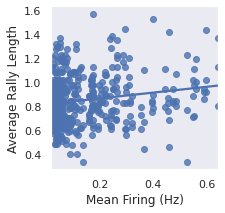

In [11]:
x = exp_corr2['mean_firing']
y = exp_corr2['hit_count']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
#ax.set_xlim([-1, 6])
ax.set_ylabel('Average Rally Length')
ax.set_xlabel('Mean Firing (Hz)')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/meanfiringreg.pdf', bbox_inches='tight') 

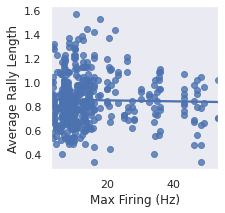

In [9]:
x = exp_corr2['max_firing']
y = exp_corr2['hit_count']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
#ax.set_xlim([-1, 6])
ax.set_ylabel('Average Rally Length')
ax.set_xlabel('Max Firing (Hz)')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/maxfiringreg.pdf', bbox_inches='tight') 

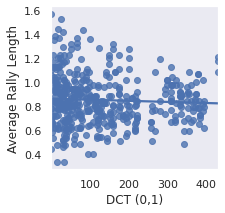

In [10]:
x = exp_corr2['normdct01_firing']
y = exp_corr2['hit_count']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
#ax.set_xlim([-1, 6])
ax.set_ylabel('Average Rally Length')
ax.set_xlabel('DCT (0,1)')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/dct01firingreg.pdf', bbox_inches='tight') 

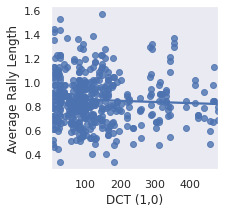

In [12]:
x = exp_corr2['normdct10_firing']
y = exp_corr2['hit_count']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
#ax.set_xlim([-1, 6])
ax.set_ylabel('Average Rally Length')
ax.set_xlabel('DCT (1,0)')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/dct10firingreg.pdf', bbox_inches='tight') 

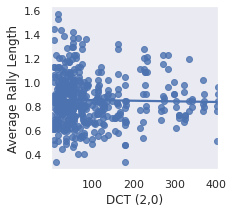

In [12]:
x = exp_corr2['normdct20_firing']
y = exp_corr2['hit_count']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
#ax.set_xlim([-1, 6])
ax.set_ylabel('Average Rally Length')
ax.set_xlabel('DCT (2,0)')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/dct20firingreg.pdf', bbox_inches='tight') 

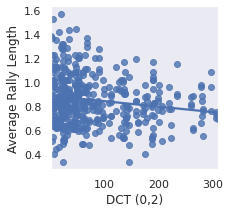

In [14]:
x = exp_corr2['normdct02_firing']
y = exp_corr2['hit_count']
f, ax = plt.subplots()
#ax.xaxis.update_units(x)
sns.regplot(x=x, y=y, ci=None)
sns.set(style="darkgrid")
#ax.set_xlim([-1, 6])
ax.set_ylabel('Average Rally Length')
ax.set_xlabel('DCT (0,2)')
ax.grid(False)
sns.set(rc={'figure.figsize':(3,3)})
plt.savefig('/home/jovyan/work/dishpill/Analysis/Plots/dct02firingreg.pdf', bbox_inches='tight') 